# Task for session2_cont and session3: 
## Edge-Preserving Denoising Filters & Feature Matching

**Instructions:**  
**please dont use .py to solve this task, just use tasks2.ipynb and edit the cells.**
- After forking the [SkyXperts-Vision-Course repo](https://github.com/ffathy-tdx/SkyXperts-Vision-Course) on GitHub. (you should have already dont this in the last session & uploaded task1)
- Go to your fork of the repo on GitHub.
- At the top, look for a yellow box that says “This branch is X commits behind…”
- Click the Sync fork or Update branch button.
The new task will show up in your tasks/ folder.  
- Upload your task to your forked repo (like you've done with task1 before)
---

## 1. DoG, LoG, and Edge-Preserving Denoising Filters

**Task:**
- Briefly read the descriptions below, then apply each filter to `'sample.jpg'` (or any test image you choose).
- Compare the results visually and write your observations.

**Background:**
- **DoG (Difference of Gaussian):** Used for edge detection by subtracting two blurred versions of the image (with different Gaussian sigmas).
- **LoG (Laplacian of Gaussian):** Uses a single Gaussian blur followed by Laplacian to highlight regions of rapid intensity change (edges).
- **Edge-Preserving Denoising (Bilateral Filter):** Smooths image while preserving edges (unlike simple Gaussian blur). You've already used this at the end of task1.

---

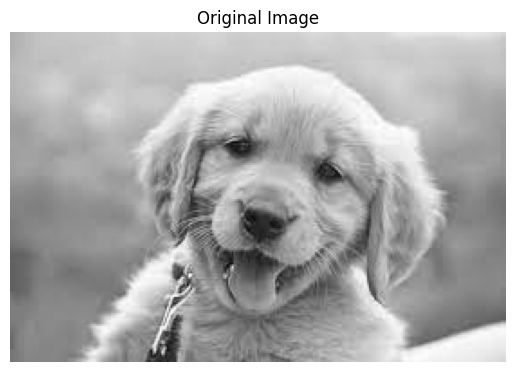

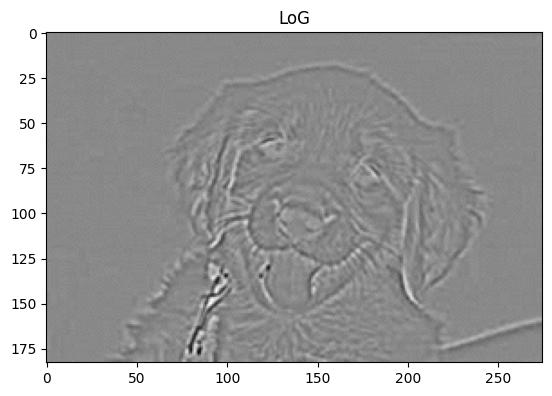

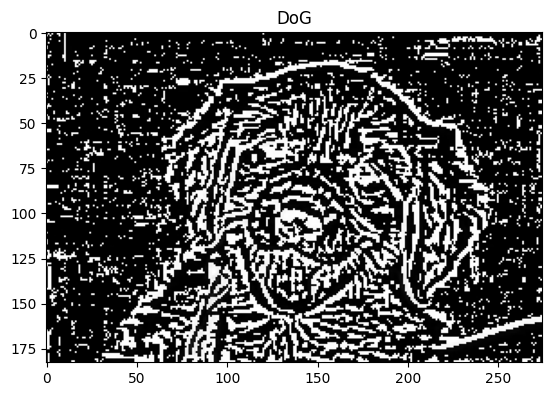

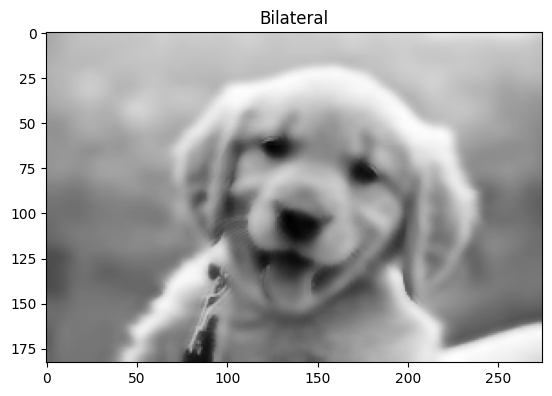

In [25]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('dogBGR.jpg', 0)  # Use grayscale for filtering
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('Original Image'); plt.show()

blur = cv2.GaussianBlur(img, (5,5), 1)

# TODO: Apply DoG
blur1 = cv2.GaussianBlur(img, (5, 5), 1)
blur2 = cv2.GaussianBlur(img, (5, 5), 2)
dog = blur1 - blur2

# TODO: Apply LoG
log = cv2.Laplacian(blur, cv2.CV_64F)

# TODO: Apply bilateral (edge-preserving) filter
bilateral = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

# Show all results for comparison
plt.imshow(log, cmap="gray"); plt.title("LoG"); plt.show()
plt.imshow(dog, cmap="gray"); plt.title("DoG"); plt.show()
plt.imshow(bilateral, cmap="gray"); plt.title("Bilateral"); plt.show()


**Q1: What differences do you observe between DoG, LoG, and the edge-preserving filter?**

LoG smoothed the image and highlighted the main edges in the image (the outline of the dog); it's mainly used for edge detection.

The DoG filter sharpened the image and showed all edges in the picture. It also seems to add more noise and gives a high contrast result.

Bilateral filter mainly just blurred the picture, keeping intact the main edges.

## 2. Keypoints & Descriptors: SIFT vs. ORB

**Task:**
- Detect and plot keypoints on `'sample.jpg'` using SIFT and ORB.
- Compare the number and distribution of detected keypoints.

**Background:**
- **Keypoints:** Distinctive image points (corners/blobs) useful for matching.
- **Descriptors:** Vectors that describe local patches around keypoints for comparison/matching.

---

In [29]:
# Detect and plot SIFT keypoints
sift = cv2.SIFT_create()
sift_keypoints, descriptors = sift.detectAndCompute(img.astype(np.uint8), None)
img_sift = cv2.drawKeypoints(img, sift_keypoints, None)
cv2.imshow("sift keypoints", img_sift)
cv2.waitKey(0)


# Detect and plot ORB keypoints
orb = cv2.ORB_create()
orb_keypoints = orb.detect(img)
orb_keypoints, descriptors = orb.compute(img, orb_keypoints)
imageresult = cv2.drawKeypoints(img, orb_keypoints, None, color=(255,0,0), flags=0)
cv2.imshow('ORB_image', imageresult)
cv2.waitKey(0)
cv2.destroyAllWindows()
# TODO: Count and compare number of keypoints for SIFT and ORB
print("sift keypoints: ", len(sift_keypoints))
print("orb keypoints: ", len(orb_keypoints))


sift keypoints:  261
orb keypoints:  393


**Q2: How do the number and distribution of keypoints differ between SIFT and ORB?**

The number of keypoints in SIFT is less than that in ORB, however in SIFT, the keypoints are more scattered across parts of the outline of the image as well as internal parts, unlike ORB keypoints which mainly cluster around the internal features and not the general outline of the image.

## 3. Feature Matching with Descriptors

**Task:**
- Load a second image (e.g., `'sample2.jpg'`).
- Detect keypoints/descriptors using SIFT or ORB in both images.
- Match the features between the images using BFMatcher or FLANN.
- Plot the top matches.

**Background:**
- **Feature matching** helps recognize objects/scenes or estimate image transformations.

---

In [35]:
# Load second image
img2 = cv2.imread('dogrotated.jpg', 0)

# Detect SIFT keypoints/descriptors in both images
sift = cv2.SIFT_create()
kp1, d1 = sift.detectAndCompute(img.astype(np.uint8), None)
img_sift = cv2.drawKeypoints(img, kp1, None)

sift2 = cv2.SIFT_create()
kp2, d2 = sift.detectAndCompute(img2.astype(np.uint8), None)
img2_sift = cv2.drawKeypoints(img2, kp2, None)

# BFMatcher with default params
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
# Draw matches
matches = bf.match(d1, d2)
matches = sorted(matches, key=lambda x:x.distance)
numberofmatches = 20
img3 = cv2.drawMatches(img, kp1, img2, kp2, matches[:numberofmatches], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2.imshow("matched image", img3)
cv2.waitKey(0)
cv2.destroyAllWindows()
# bonus TODO: Try with ORB or FLANN if you like

**Q3: What do you notice about the feature matches? Are there any mismatches or errors? How might you improve the matching process?**

The matches seem to be consistent and accurate, however, to improve, the number of matches can be increased.

**Bonus Task (Optional, for extra credit):**
- Try using different image preprocessing steps *before* edge detection or feature extraction.
    - For example:
        - Add noise to your image (e.g., Gaussian noise, salt-and-pepper noise).
        - Apply a sharpening filter to your image.
    - Then, run DoG, LoG, or any edge-preserving filter and observe the changes.
- **What to do:**
    - Show the results (images/plots) for at least one type of preprocessing + edge detection.
    - Briefly explain:
        - How does noise affect edge maps or keypoints?
        - Does sharpening make features easier or harder to detect/match?

**You can add your code and observations in the cells below.**


In [ ]:
# Write your code here

_What are your observations?_
write them here

## 4. Reflection (Optional)

- What was the most challenging or interesting part of this task for you?
- Any feedback or thoughts?

_Write your reflection here._